# Imports


In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os
from pathlib import Path
import numpy as np

# Datasets

In [6]:
parent_dir = os.path.abspath(os.path.join(os.getcwd(), '..'))

# Definindo o caminho base para a pasta Pre-processamento
base_path = Path(parent_dir) 
file = base_path / 'resultados_cotton.xlsx'

# Carregando cada planilha em um DataFrame separado
plsr_msc = pd.read_excel(file, sheet_name='PLSR - MSC', header=1)
plsr_snv = pd.read_excel(file, sheet_name='PLSR - SNV', header=1)
plsr_sg = pd.read_excel(file, sheet_name='PLSR - SG', header=1)

# Exibindo as primeiras linhas para verificação
#print(plsr_msc.head())
#print(plsr_snv.head())
#print(plsr_sg.head())

# Algoritmos

In [43]:
# Carregando os DataFrames (ajuste o caminho e o sheet_name conforme necessário)
plsr_msc_algoritmo = pd.read_excel(file, sheet_name='PLSR - MSC', header=1, usecols="A:F")
plsr_msc_unscrambler = pd.read_excel(file, sheet_name='PLSR - MSC', header=1, usecols="H:M")

# Definir nomes das colunas desejadas
colunas = ['Atributo', 'Y', 'Slope', 'Offset', 'RMSE', 'R2']

# Renomear colunas para garantir que sejam iguais
plsr_msc_algoritmo.columns = colunas
plsr_msc_unscrambler.columns = colunas
comparacao = pd.DataFrame(columns=['Slope', 'Offset', 'RMSE', 'R2'])

# Fazer a comparação
comparacao['Slope'] = plsr_msc_algoritmo['Slope'] - plsr_msc_unscrambler['Slope']
comparacao['Offset'] = plsr_msc_algoritmo['Offset'] - plsr_msc_unscrambler['Offset']
comparacao['RMSE'] = plsr_msc_algoritmo['RMSE'] - plsr_msc_unscrambler['RMSE']
comparacao['R2'] = plsr_msc_algoritmo['R2'] - plsr_msc_unscrambler['R2']

# Criação de uma tabela resumida
resumo_comparacao = pd.concat([plsr_msc_algoritmo.head(10), 
                               plsr_msc_unscrambler.head(10), 
                               comparacao.head(10)], 
                              keys=['Algoritmo', 'Unscrambler', 'Diferença'], 
                              names=['Tipo'])

resumo_comparacao


Atributo           Y     Slope     Offset      RMSE  \
Tipo                                                                    
Algoritmo   0          SST  Referência  0.819934   2.520107  1.127221   
            1          SST    Predição  0.794042   2.888446  1.368351   
            2           PH  Referência  0.619416   1.250036  0.190269   
            3           PH    Predição  0.500726   1.638481  0.234505   
            4           AT  Referência  0.641407   0.402620  0.351165   
            5           AT    Predição  0.533295   0.528036  0.445926   
            6  FIRMEZA (N)  Referência  0.649683 179.716286 60.827107   
            7  FIRMEZA (N)    Predição  0.520817 245.157504 80.642385   
            8      UBS (%)  Referência  0.647443   5.407884  1.910040   
            9      UBS (%)    Predição  0.620626   5.813119  2.039323   
Unscrambler 0          SST  Referência  0.835734   2.310621  1.019783   
            1          SST    Predição  0.810146   2.678533  1.206906   
            2           PH  Referência  0.599085   1.320478  0.190660   
            3           PH    Predição  0.483000   1.704439  0.239867   
            4           AT  Referência  0.658337   0.378434  0.328578   
            5           AT    Predição  0.516457   0.536168  0.452955   
            6  FIRMEZA (N)  Referência  0.649420 178.340150 57.329231   
            7  FIRMEZA (N)    Predição  0.513565 247.259740 78.954025   
            8      UBS (%)  Referência  0.620507   5.845124  1.907171   
            9      UBS (%)    Predição  0.596922   6.208926  2.006164   
Diferença   0          NaN         NaN -0.015800   0.209486  0.107437   
            1          NaN         NaN -0.016105   0.209914  0.161444   
            2          NaN         NaN  0.020331  -0.070442 -0.000391   
            3          NaN         NaN  0.017726  -0.065957 -0.005362   
            4          NaN         NaN -0.016929   0.024186  0.022586   
            5          NaN         NaN  0.016838  -0.008133 -0.007029   
            6          NaN         NaN  0.000263   1.376136  3.497876   
            7          NaN         NaN  0.007252  -2.102236  1.688360   
            8          NaN         NaN  0.026936  -0.437240  0.002869   
            9          NaN         NaN  0.023704  -0.395807  0.033159   

                     R2  
Tipo                     
Algoritmo   0  0.819934  
            1  0.734656  
            2  0.619416  
            3  0.421879  
            4  0.641407  
            5  0.421762  
            6  0.649683  
            7  0.384265  
            8  0.647443  
            9  0.598102  
Unscrambler 0  0.835733  
            1  0.772541  
            2  0.599085  
            3  0.372669  
            4  0.658337  
            5  0.358121  
            6  0.649420  
            7  0.342635  
            8  0.620507  
            9  0.584874  
Diferença   0 -0.015800  
            1 -0.037885  
            2  0.020331  
            3  0.049210  
            4 -0.016929  
            5  0.063641  
            6  0.000263  
            7  0.041629  
            8  0.026936  
            9  0.013227

# Visualizações

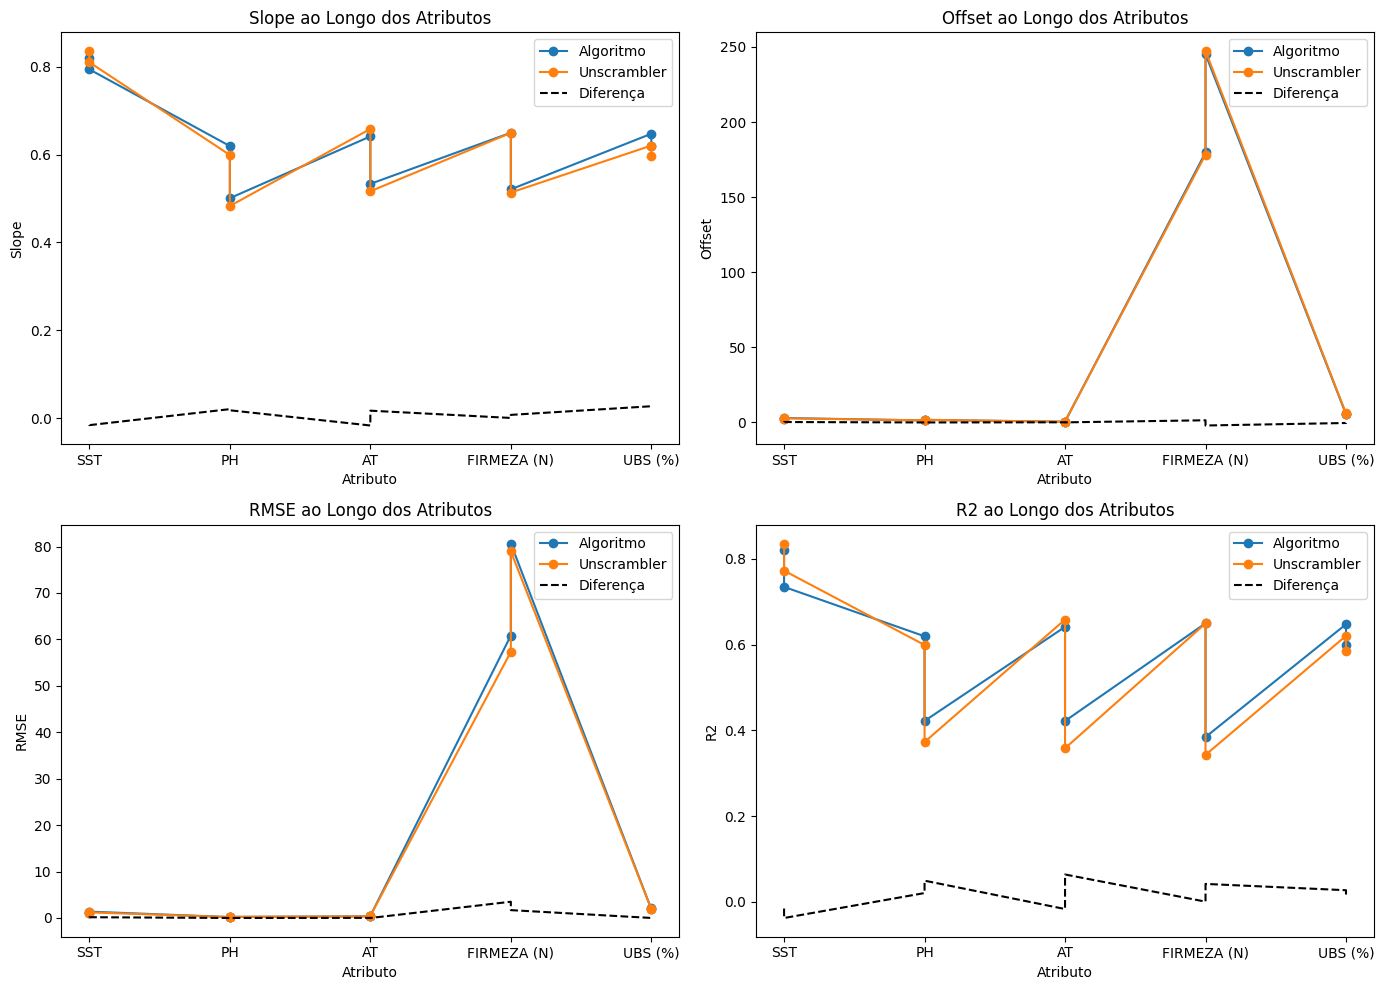

In [46]:
# Ajustando o tamanho da figura
plt.figure(figsize=(14, 10))

# Criar subplots para cada métrica
metrics = ['Slope', 'Offset', 'RMSE', 'R2']
for i, metric in enumerate(metrics, start=1):
    plt.subplot(2, 2, i)
    
    # Garantir que os dados sejam convertidos para strings se houver problemas com os tipos
    x_data = plsr_msc_algoritmo['Atributo'].astype(str)
    y_algoritmo = plsr_msc_algoritmo[metric]
    y_unscrambler = plsr_msc_unscrambler[metric]
    y_diff = comparacao[metric]
    
    plt.plot(x_data, y_algoritmo, label='Algoritmo', marker='o')
    plt.plot(x_data, y_unscrambler, label='Unscrambler', marker='o')
    plt.plot(x_data, y_diff, label='Diferença', linestyle='--', color='black')
    
    plt.title(f'{metric} ao Longo dos Atributos')
    plt.xlabel('Atributo')
    plt.ylabel(metric)
    plt.legend()

plt.tight_layout()
plt.show()

# Teste


In [18]:
import pandas as pd

# Lista de modelos
modelos = ["PLSR", "PCR", "RFR", "SVMR"]
# DataFrames para armazenar as melhores métricas
best_metrics_cv = pd.DataFrame()
best_metrics_pred = pd.DataFrame()

# Iterar por cada modelo
for modelo in modelos:
    # Leitura dos dados da planilha
    df = pd.read_excel('avaliacao_final.xlsx', sheet_name=modelo)
    
    # Filtragem dos dados para selecionar R² e RMSE
    metrics_filtered = df[['ATRIBUTO', 'FILTRO', 'ESTÁGIO', 'R²', 'RMSE']]
    
    # Filtrar apenas as linhas de Cross-Validation e Predição
    metrics_cv = metrics_filtered[metrics_filtered['ESTÁGIO'] == 'Cross-Validation']
    metrics_pred = metrics_filtered[metrics_filtered['ESTÁGIO'] == 'Predição']
    
    # DataFrame para armazenar as melhores métricas para este modelo
    best_metrics_modelo_cv = pd.DataFrame(columns=['ATRIBUTO', 'FILTRO', 'ESTÁGIO', 'R²', 'RMSE', 'modelo'])
    best_metrics_modelo_pred = pd.DataFrame(columns=['ATRIBUTO', 'FILTRO', 'ESTÁGIO', 'R²', 'RMSE', 'modelo'])
    
    # Lista de atributos
    atributos = ["SST", "AT", "PH", "FIRMEZA", "UBS"]
    
    # Iterar por atributos
    for atributo in atributos:
        # Filtrar dados para o atributo atual
        subset_cv = metrics_cv[metrics_cv['ATRIBUTO'] == atributo]
        subset_pred = metrics_pred[metrics_pred['ATRIBUTO'] == atributo]
        
        # Verificar se há dados para o atributo em Cross-Validation
        if not subset_cv.empty:
            # Lista de filtros
            filtros = ["MSC", "SG", "SNV"]
            
            # DataFrame para armazenar as melhores métricas por filtro para Cross-Validation
            best_for_attribute_cv = pd.DataFrame(columns=['FILTRO', 'R²', 'RMSE'])
            
            for filtro in filtros:
                # Filtrar dados para o filtro atual
                subset_filter_cv = subset_cv[subset_cv['FILTRO'] == filtro]
                
                # Verificar se há dados para o filtro
                if not subset_filter_cv.empty:
                    # Encontrar o melhor estágio para o maior R²
                    best_r2_row = subset_filter_cv.loc[subset_filter_cv['R²'].idxmax()]
                    
                    # Adicionar ao DataFrame das melhores métricas para o atributo
                    best_for_attribute_cv = pd.concat([best_for_attribute_cv, best_r2_row.to_frame().T], ignore_index=True)
            
            # Selecionar o melhor filtro para o atributo
            if not best_for_attribute_cv.empty:
                # Selecionar a linha com o maior R²
                best_r2_row_cv = best_for_attribute_cv.loc[best_for_attribute_cv['R²'].idxmax()]
                
                # Adicionar ao DataFrame das melhores métricas do modelo
                best_metrics_modelo_cv = pd.concat([best_metrics_modelo_cv, best_r2_row_cv.to_frame().T], ignore_index=True)
        
        # Verificar se há dados para o atributo em Predição
        if not subset_pred.empty:
            # Lista de filtros
            filtros = ["MSC", "SG", "SNV"]
            
            # DataFrame para armazenar as melhores métricas por filtro para Predição
            best_for_attribute_pred = pd.DataFrame(columns=['FILTRO', 'R²', 'RMSE'])
            
            for filtro in filtros:
                # Filtrar dados para o filtro atual
                subset_filter_pred = subset_pred[subset_pred['FILTRO'] == filtro]
                
                # Verificar se há dados para o filtro
                if not subset_filter_pred.empty:
                    # Encontrar o melhor estágio para o maior R²
                    best_r2_row = subset_filter_pred.loc[subset_filter_pred['R²'].idxmax()]
                    
                    # Adicionar ao DataFrame das melhores métricas para o atributo
                    best_for_attribute_pred = pd.concat([best_for_attribute_pred, best_r2_row.to_frame().T], ignore_index=True)
            
            # Selecionar o melhor filtro para o atributo
            if not best_for_attribute_pred.empty:
                # Selecionar a linha com o maior R²
                best_r2_row_pred = best_for_attribute_pred.loc[best_for_attribute_pred['R²'].idxmax()]
                
                # Adicionar ao DataFrame das melhores métricas do modelo
                best_metrics_modelo_pred = pd.concat([best_metrics_modelo_pred, best_r2_row_pred.to_frame().T], ignore_index=True)
    
    # Adicionar a coluna do modelo
    best_metrics_modelo_cv['modelo'] = modelo
    best_metrics_modelo_pred['modelo'] = modelo
    
    # Adicionar ao DataFrame final
    best_metrics_cv = pd.concat([best_metrics_cv, best_metrics_modelo_cv], axis=0, ignore_index=True)
    best_metrics_pred = pd.concat([best_metrics_pred, best_metrics_modelo_pred], axis=0, ignore_index=True)

# Encontrar as melhores métricas para cada atributo, independentemente do modelo e filtro
final_best_metrics_cv = best_metrics_cv.groupby('ATRIBUTO').apply(lambda x: x.loc[x['R²'].idxmax()]).reset_index(drop=True)
final_best_metrics_pred = best_metrics_pred.groupby('ATRIBUTO').apply(lambda x: x.loc[x['R²'].idxmax()]).reset_index(drop=True)

# Salvar os DataFrames finais em arquivos Excel separados
final_best_metrics_cv.to_excel('melhores_metricas_cv.xlsx', index=False)
final_best_metrics_pred.to_excel('melhores_metricas_pred.xlsx', index=False)

print("Melhores métricas para Cross-Validation:")
print(final_best_metrics_cv)
print("\nMelhores métricas para Predição:")
print(final_best_metrics_pred)


Melhores métricas para Cross-Validation:
  ATRIBUTO FILTRO           ESTÁGIO        R²       RMSE modelo
0       AT     SG  Cross-Validation  0.502206   0.413886    PCR
1  FIRMEZA     SG  Cross-Validation  0.483860  73.834109   PLSR
2       PH     SG  Cross-Validation  0.459896   0.227062   SVMR
3      SST     SG  Cross-Validation  0.781907   1.240912   PLSR
4      UBS    SNV  Cross-Validation  0.661785   1.829927   SVMR

Melhores métricas para Predição:
  ATRIBUTO FILTRO   ESTÁGIO        R²       RMSE modelo
0       AT    SNV  Predição  0.709751   0.276693    RFR
1  FIRMEZA    SNV  Predição  0.589085  52.475432    PCR
2       PH     SG  Predição  0.704387   0.142304   SVMR
3      SST    MSC  Predição  0.765584   1.018845   PLSR
4      UBS     SG  Predição  0.799840   0.969508    RFR


C:\Users\Luyza\AppData\Local\Temp\ipykernel_8344\121951683.py:99: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  final_best_metrics_cv = best_metrics_cv.groupby('ATRIBUTO').apply(lambda x: x.loc[x['R²'].idxmax()]).reset_index(drop=True)
C:\Users\Luyza\AppData\Local\Temp\ipykernel_8344\121951683.py:100: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  final_best_metrics_pred = best_metrics_pred.groupby('ATRIBUTO